In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg'),
 PosixPath('datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/921984328_a60076f070_m.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg'),
 PosixPath('datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/921984328_a60076f070_m.jpg')]

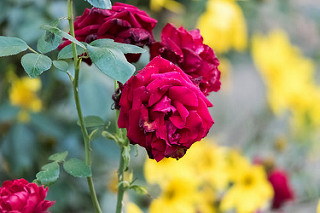

In [8]:
PIL.Image.open(str(roses[0]))


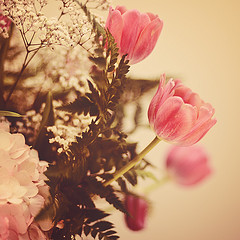

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

**Read flowers images from disk into numpy array using opencv**

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [13]:
X = np.array(X)
y = np.array(y)

**Train test split**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Preprocessing: scale images**

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Build convolutional neural network and train it**

In [16]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history=model.fit(X_train_scaled, y_train, epochs=11)   

Epoch 1/11
86/86 [==============================] - 12s 23ms/step - loss: 1.2823 - accuracy: 0.4564
Epoch 2/11
86/86 [==============================] - 2s 23ms/step - loss: 0.9797 - accuracy: 0.6163
Epoch 3/11
86/86 [==============================] - 2s 23ms/step - loss: 0.8308 - accuracy: 0.6784
Epoch 4/11
86/86 [==============================] - 2s 23ms/step - loss: 0.6625 - accuracy: 0.7482
Epoch 5/11
86/86 [==============================] - 2s 23ms/step - loss: 0.4598 - accuracy: 0.8408
Epoch 6/11
86/86 [==============================] - 2s 23ms/step - loss: 0.2409 - accuracy: 0.9215
Epoch 7/11
86/86 [==============================] - 2s 23ms/step - loss: 0.1251 - accuracy: 0.9597
Epoch 8/11
86/86 [==============================] - 2s 24ms/step - loss: 0.0488 - accuracy: 0.9866
Epoch 9/11
86/86 [==============================] - 2s 23ms/step - loss: 0.0293 - accuracy: 0.9938
Epoch 10/11
86/86 [==============================] - 2s 23ms/step - loss: 0.0268 - accuracy: 0.9927
Epoch 11

In [19]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 2.0028 - accuracy: 0.6111


[2.0027918815612793, 0.6111111044883728]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (61%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [20]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -1.7973833 ,   3.7552288 ,   2.1679862 ,   0.6272929 ,
          0.2555047 ],
       [ 12.297098  ,   6.563096  ,   5.4377594 , -16.36574   ,
         -8.814627  ],
       [ -1.0845513 ,   1.5704963 ,   2.4844713 ,  -5.913738  ,
         -0.18971899],
       ...,
       [ -1.6426562 ,  -0.70430344,  -6.0436516 ,   1.9374764 ,
          3.7388513 ],
       [ -1.081461  ,   1.9049962 ,   0.5514022 ,  -3.548316  ,
          1.3696061 ],
       [ -1.3390766 ,  -1.9870139 ,  -6.0456004 ,   1.8973413 ,
          6.30442   ]], dtype=float32)

In [21]:
score = tf.nn.softmax(predictions[1])
np.argmax(score)

0

In [22]:
y_test[1]


0

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

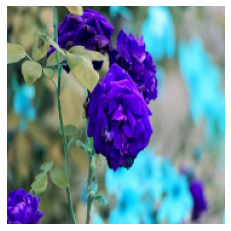

In [24]:
plt.axis('off')
plt.imshow(X[0])

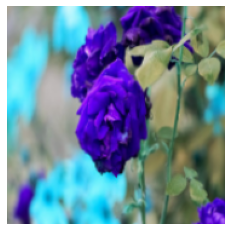

In [25]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

**Train the model using data augmentation and a drop out layer**

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 5s 26ms/step - loss: 1.3422 - accuracy: 0.4360
Epoch 2/30
86/86 [==============================] - 2s 25ms/step - loss: 1.0434 - accuracy: 0.5756
Epoch 3/30
86/86 [==============================] - 2s 26ms/step - loss: 0.9622 - accuracy: 0.6254
Epoch 4/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8900 - accuracy: 0.6577
Epoch 5/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8473 - accuracy: 0.6784
Epoch 6/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8131 - accuracy: 0.6857
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7602 - accuracy: 0.7046
Epoch 8/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7013 - accuracy: 0.7307
Epoch 9/30
86/86 [==============================] - 2s 25ms/step - loss: 0.6912 - accuracy: 0.7326
Epoch 10/30
86/86 [==============================] - 2s 25ms/step - loss: 0.6606 - accuracy: 0.7493
Epoch 11/

In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 15ms/step - loss: 1.0578 - accuracy: 0.7059


[1.0578280687332153, 0.7058823704719543]